### Autoren:
Mat. Nr.: 2888214, zuständig für Aufg. 2, 3, 5 <br>
Mat. Nr.: 3626401, zuständig für Aufg. 1, 4, 6

## Aufg. 1: Business Understanding

### Zielsetzung
Das Ziel dieses Projekts ist es, fünf potenzielle Städte für einen sechsmonatigen Aufenthalt als Remote Worker in der Kreativbranche zu identifizieren. Der Fokus liegt dabei auf tropisch warmen Ländern, da diese nicht nur ein angenehmes Klima bieten, sondern auch einzigartige wirtschaftliche und infrastrukturelle Eigenschaften aufweisen.

### Ausgangssituation und Fragestellungen
Wir arbeiten mit dem globalen „Cost of Living“-Datensatz von Kaggle, der uns detaillierte Informationen über Lebenshaltungskosten in Städten weltweit liefert. Anhand dieses Datensatzes wollen wir untersuchen, wie sich Lebenshaltungskosten und Infrastruktur in tropisch warmen Ländern im Vergleich zu Regionen wie Europa und Nordamerika darstellen. Unsere beiden Personen ernähren sich gerne Gesund, und legen daher auch viel Wert auf die Preise von Früchten & Obst und lokalen Essen.

### Zentrale Hypothesen
1. **Tropisch Warme Länder sind meist Touristen Hotspots:**  
   Diese Hypothese basiert auf der Annahme, dass der touristische Reiz tropischer Länder zu spezifischen Preisstrukturen führt. Saisonale Schwankungen und hohe Nachfrage in bestimmten Sektoren (z.B. Unterkunft, Gastronomie) könnten die Lebenshaltungskosten in diesen Städten beeinflussen.

2. **Tropische warme Länder haben tendenziell niedrigere Kosten als Europa und Nordamerika:**  
   Aufgrund unterschiedlicher wirtschaftlicher Rahmenbedingungen und oft geringerer Durchschnittseinkommen gehen wir davon aus, dass die allgemeinen Lebenshaltungskosten in tropisch warmen Ländern unter denen in entwickelten Regionen liegen.

3. **Eine gute Infrastruktur korreliert mit höheren Kosten:**  
   Es wird vermutet, dass Städte mit moderner Infrastruktur, etwa in Bereichen wie Internet und öffentlichem Verkehr, höhere Lebenshaltungskosten aufweisen. Diese Investitionen in Infrastruktur könnten sowohl den Komfort als auch das Preisniveau in die Höhe treiben.
4. **Höhere lokale Gehälter gehen mit höheren Wohnkosten einher:**
5. **Transportkosten invers zu lokalen Einkommen**
6. **Freizeitkosten als Indikator für den urbanen Lebensstandard**


### Weiteres Vorgehen
Auf Basis dieser Hypothesen werden wir in der Datenexploration und -analyse prüfen, inwiefern diese Zusammenhänge bestehen. Die gewonnenen Erkenntnisse sollen als Entscheidungsgrundlage dienen, um letztlich fünf Städte auszuwählen, die sowohl kosteneffizient als auch attraktiv hinsichtlich Klima, Infrastruktur und touristischem Potenzial sind.

## Aufg. 2: Data Preperation 
(Mappen der Kontinente und löschen der schlechten Qualität)

In [2]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from thefuzz import process

def find_best_match(country):
    # Versuche zuerst ein direktes Mapping
    if country in country_to_continent:
        return country_to_continent[country]

    # Versuche es mit dem ersten Wort
    first_word = country.split()[0]
    if first_word in country_to_continent:
        return country_to_continent[first_word]

    # Falls kein direkter Treffer: Fuzzy Matching versuchen
    best_match, score = process.extractOne(country, country_to_continent.keys())
    if score > 80:  # 80 bedeutet "ziemlich sicher"
        return country_to_continent[best_match]

    # Falls nichts gefunden, None zurückgeben
    return None

# Entferne die Spalten mit schlechter Qualität
data = pd.read_csv("./data/cost-of-living_v2.csv")
data.drop(data[data['data_quality'] == 0].index, inplace=True)
data.sort_values(by=['country'], inplace=True)
data.reset_index(drop=True, inplace=True)


# Mappen der Länder zu Kontinenten
url = "https://www.apicountries.com/countries"
response = requests.get(url)
countries = response.json()

country_to_continent = {}
for item in countries:
    country_to_continent[item["name"]] = item["region"]

    # Alternative Namen hinzufügen, falls vorhanden
    if "altSpellings" in item:
        for alt_name in item["altSpellings"]:
            country_to_continent[alt_name] = item["region"]

data["continent"] = data["country"].apply(find_best_match)
#countries = list(filter(lambda item: item['region'] != 'Europe', countries))


## Aufg. 3: Data Exploration und Analyse
Untersuchen Sie den Datensatz in Bezug auf das Ziel nach den Regeln wie in der Vorlesung gelehrt. Nutzen Sie Markup, um wichtige Erkenntnisse zu dokumentieren.

Werten Sie sowohl Kontinente, Länder, Städte sinnvoll nach Ihren Zielen generell aus. Berücksichtigen Sie ihr Gruppenziel dabei spezifisch.

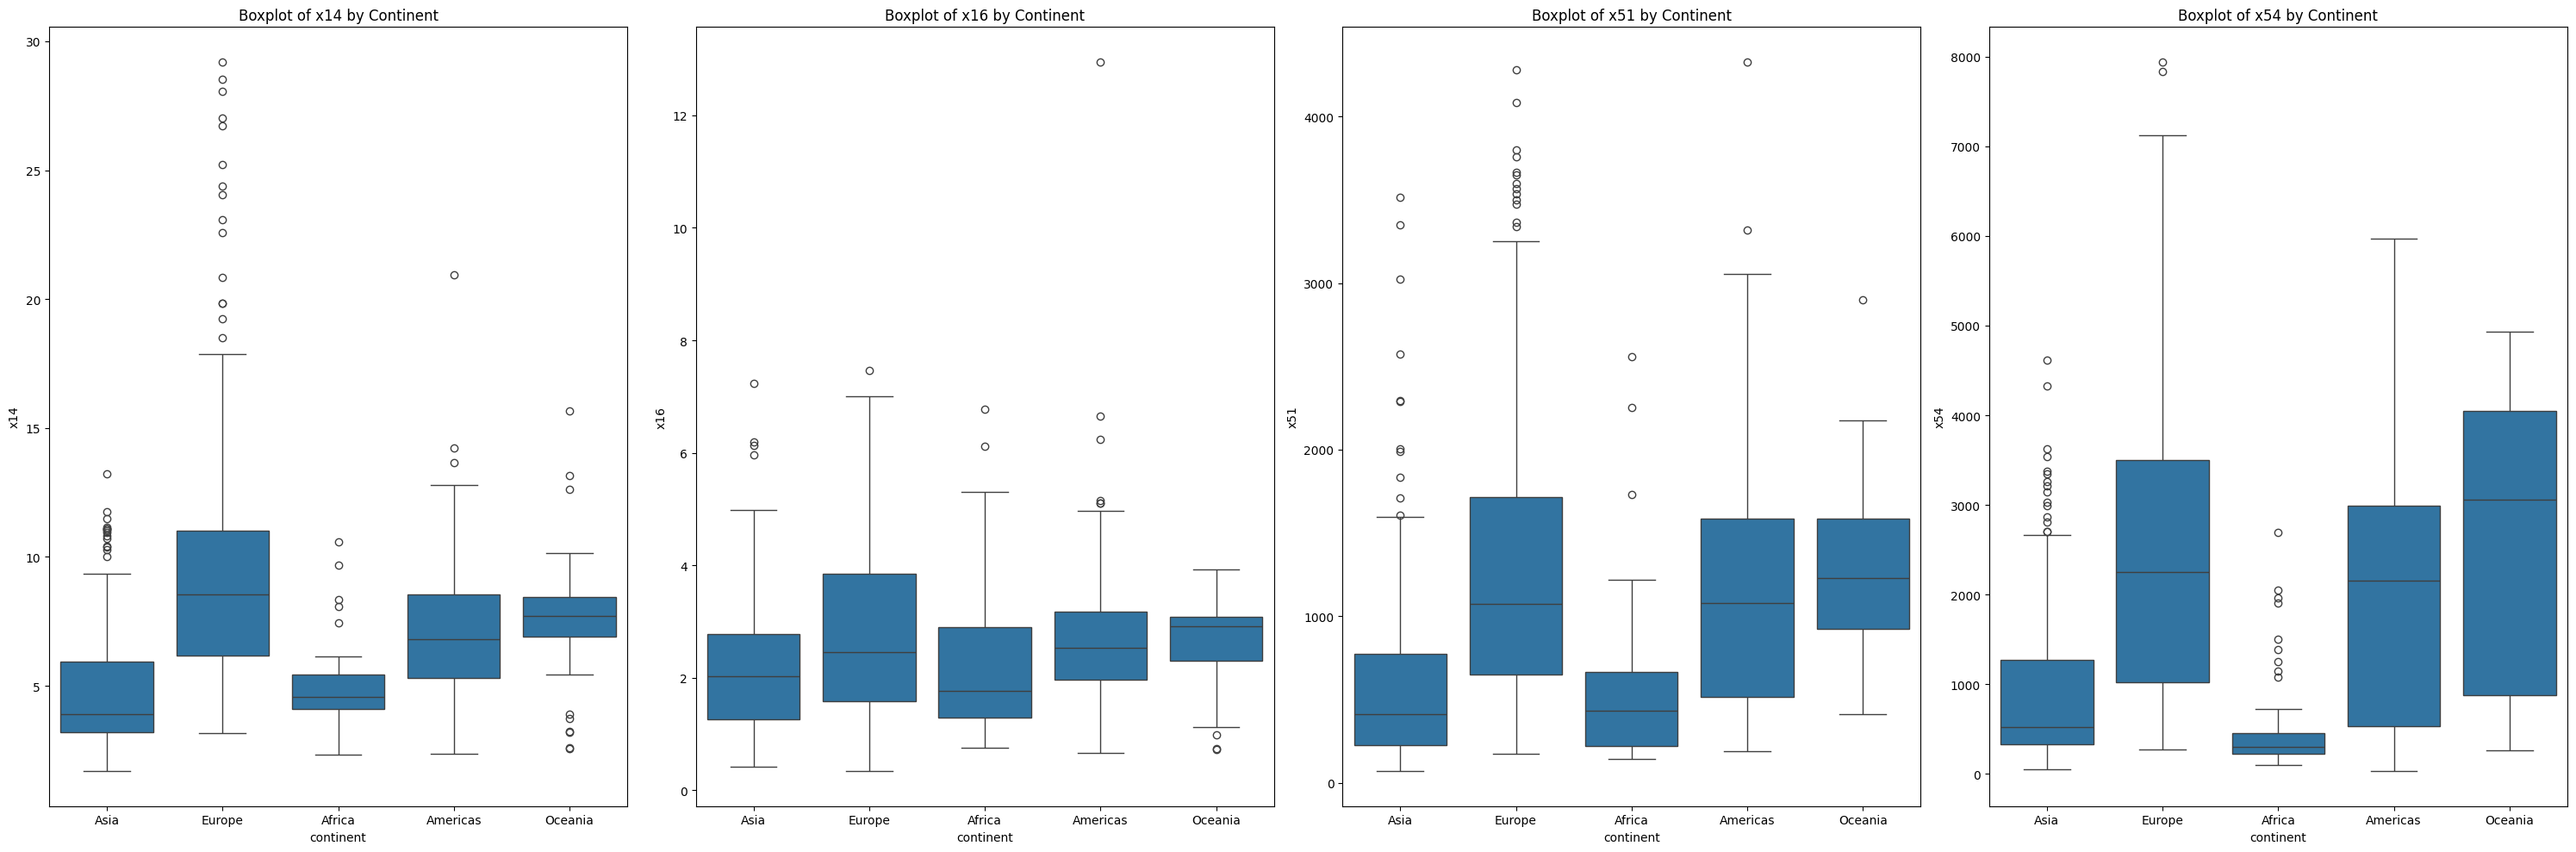

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(30, 10))
numeric_columns = ['x14','x16', 'x51', 'x54']

for ax, column in zip(axes, numeric_columns):
    sns.boxplot(x='continent', y=column, data=data, ax=ax)
    ax.set_title(f"Boxplot of {column} by Continent")

plt.tight_layout()
plt.show()

### Analyse der Lebenshaltungskosten nach Kontinenten

Für die Auswahl geeigneter tropischer Städte wurden vier zentrale Variablen aus dem globalen "Cost of Living"-Datensatz betrachtet, welche für unser Szenario als Remote Worker mit Fokus auf gesunde Ernährung relevant sind.

---

#### 🥩 x14 - Chicken Fillets (1kg)
- In Europa liegen die Preise für Hähnchenbrustfilet deutlich höher als in anderen Regionen.
- Tropische Regionen (v. a. Asien, Afrika, Teile der Amerikas) bieten hier wesentlich günstigere Preise.
- Gerade für eine proteinreiche und gesunde Ernährung ein positiver Faktor für tropische Länder.

---

#### 🍎 x16 - Apples (1kg)
- Auch für Obst, exemplarisch dargestellt anhand von Äpfeln, zeigt sich ein ähnliches Bild.
- Europa weist die höchsten Preise auf.
- In Asien und Afrika ist der Median der Apfelpreise deutlich niedriger.
- Die tropischen Länder innerhalb dieser Regionen erlauben also eine kostengünstigere gesunde Ernährung.

---

#### 🏠 x51 - Apartment (3 bedrooms) Outside of Centre
- Die Mieten in Europa und Nordamerika sind im Mittel höher als in Asien und Afrika.
- Oceania liegt zwischen den Kontinenten, zeigt jedoch auch eher höhere Kosten.
- Für tropische Regionen bedeutet das: Man erhält mehr Wohnraum für weniger Geld, was insbesondere für einen längeren Aufenthalt als Remote Worker vorteilhaft ist.

---

#### 💰 x54 - Average Monthly Net Salary (After Tax)
- Die höchsten Durchschnittsgehälter finden sich in Europa und Nordamerika.
- In tropischen Ländern (Asien, Afrika, Lateinamerika) sind die Durchschnittseinkommen geringer.
- Für unsere Situation als Remote Worker ist dies jedoch nicht nachteilig, da das Einkommen unabhängig vom lokalen Arbeitsmarkt bezogen wird.

---

### 📌 Fazit
Tropisch warme Regionen bieten im Vergleich zu Europa und Nordamerika:
- Günstigere Preise für Lebensmittel (insbesondere Obst und Fleisch).
- Niedrigere Wohnkosten.
- Für Remote Work sind diese Regionen besonders attraktiv, da die geringeren Lebenshaltungskosten direkt den Lebensstandard erhöhen, ohne dass das eigene Einkommen reduziert wird.


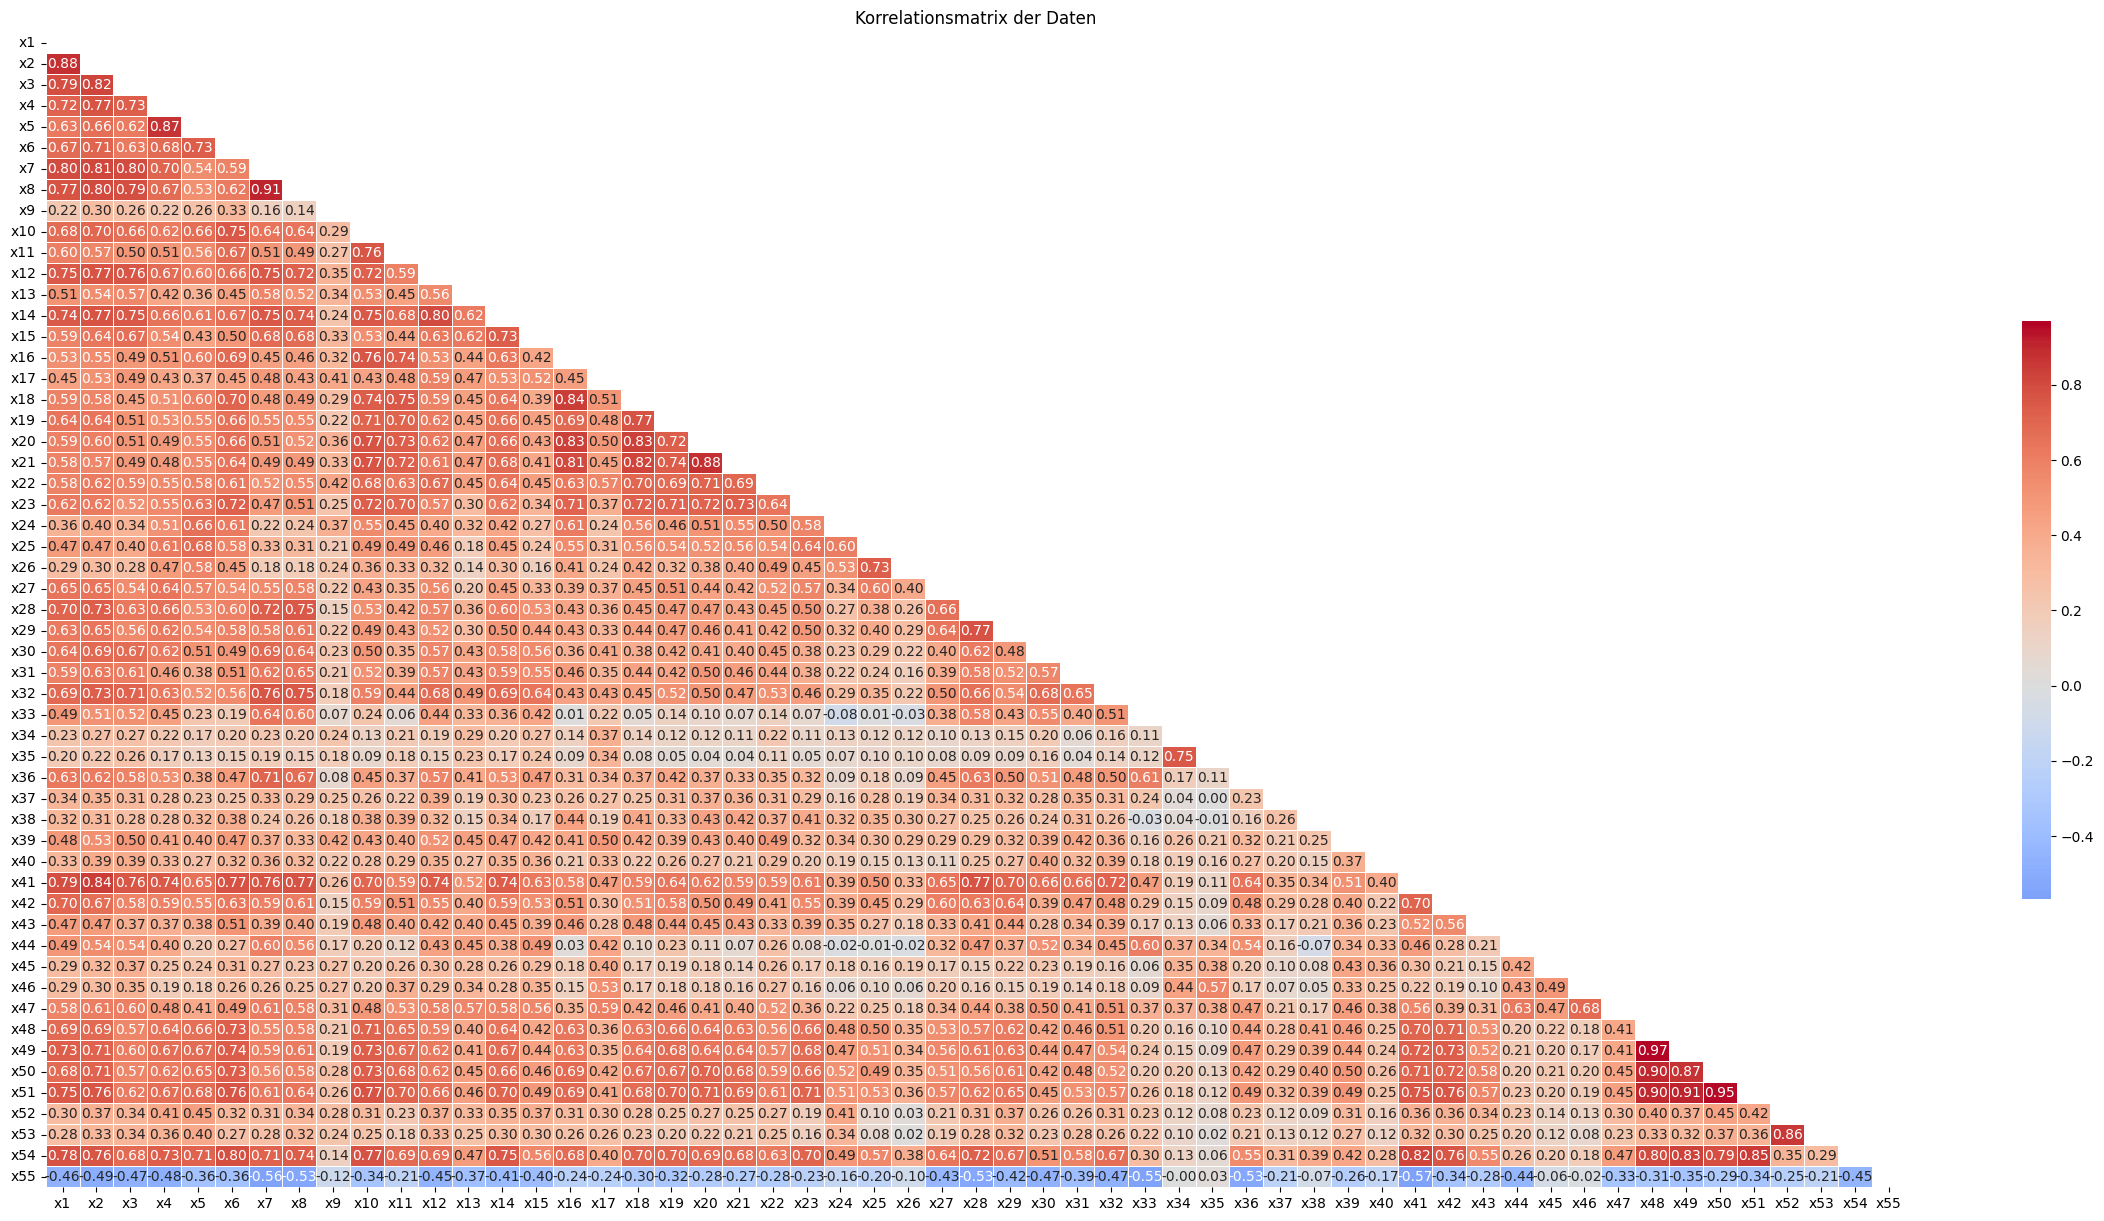

In [4]:
data.fillna(0, inplace=True)
data.drop(columns=['data_quality'], inplace=True)
corr = data.drop(columns=['city', 'country', 'continent']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(30, 15))
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title("Korrelationsmatrix der Daten")
plt.show()

### Erkenntnisse aus der Korrelationsanalyse

Zur Überprüfung unserer Hypothesen wurde eine Korrelationsmatrix über alle betrachteten Variablen erstellt. Im Folgenden sind die wichtigsten Erkenntnisse zusammengefasst:

---

#### 🍽️ Restaurant- und Lebensmittelpreise
- Zwischen den Variablen zu Restaurantpreisen (`x1` - `x6`) besteht eine sehr hohe Korrelation (z.B. `x1` zu `x2`: 0.88).
- Auch die Preise für Supermarktprodukte wie Fleisch, Käse, Obst und Gemüse (`x9` bis `x21`) korrelieren moderat bis stark (z.B. `x13` zu `x14`: 0.72).
- **Interpretation:** In Städten mit teuren Restaurants sind auch Supermarktprodukte häufig teurer. Günstige Lebensmittelpreise in Tropenstädten könnten also gleichzeitig günstige Restaurantpreise implizieren.

---

#### 🏠 Wohn- und Immobilienkosten
- Mieten und Immobilienpreise (`x48` bis `x53`) korrelieren sehr stark (teilweise > 0.85).
- Insbesondere die Mieten innerhalb und außerhalb der Stadtzentren (`x48` bis `x51`) bewegen sich im Gleichschritt.
- **Interpretation:** Hohe Mieten im Stadtzentrum deuten auch auf hohe Mieten außerhalb hin. Für die Wahl einer günstigen Stadt könnte also das generelle Mietniveau der Region entscheidend sein.

---

#### 💰 Einkommen und Lebenshaltungskosten
- Das durchschnittliche Nettoeinkommen (`x54`) korreliert stark mit Mieten und Wohnungspreisen (z.B. `x50` - Mietpreis im Zentrum: 0.80).
- Auch andere Lebenshaltungskosten wie Lebensmittelpreise zeigen eine moderate Korrelation mit dem Einkommen.
- **Interpretation:** In Regionen mit hohen lokalen Gehältern sind auch die Lebenshaltungskosten entsprechend höher. Für Remote Worker mit externem Einkommen ist dieser Zusammenhang jedoch von untergeordneter Bedeutung.

---

#### 📡 Internetpreise
- Die Kosten für Internet (`x38`) korrelieren nur schwach mit den anderen Variablen.
- **Interpretation:** Günstiges Internet ist nicht automatisch mit günstigen Mieten oder günstigen Lebensmitteln verbunden und muss daher gesondert betrachtet werden, insbesondere für Remote Worker, für die eine stabile und bezahlbare Internetverbindung essenziell ist.

---

### 💡 Gesamtfazit
- Lebenshaltungskosten sind in sich gut korreliert (Miete ↔ Gehalt, Restaurant ↔ Lebensmittel).
- Internetpreise verhalten sich weitgehend unabhängig von den übrigen Kosten.
- Für die Stadtwahl in tropischen Regionen empfiehlt es sich, neben Miet- und Lebensmittelkosten auch gezielt auf die Internetpreise zu achten.


In [5]:
from bs4 import BeautifulSoup

url = "https://worldpopulationreview.com/country-rankings/tropical-countries"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
table = soup.find("table", class_="wpr-table min-w-full border-collapse")
rows = table.find_all("tr")
tropical_countries = []
for row in rows:
    cells = row.find_all("td")
    if len(cells) > 0:
        if "Fully Tropical" == cells[2].text.strip():
            tropical_countries.append(cells[1].text.strip())
print(len(data))
data_tropical = data[data["country"].isin(tropical_countries)].copy()
print(len(tropical_countries) - len(data_tropical), len(data_tropical))
print(set(tropical_countries) - set(data["country"].unique()))

923
18 78
{'Aruba', 'Tonga', 'Guadeloupe', 'Nauru', 'Haiti', 'Micronesia', 'Togo', 'Saint Kitts and Nevis', 'Laos', 'Kiribati', 'Benin', 'South Sudan', 'Chad', 'Suriname', 'Vanuatu', 'Cape Verde', 'Burkina Faso', 'Niger', 'Grenada', 'Gambia', 'Mauritania', 'Martinique', 'Marshall Islands', 'Eritrea', 'United States Virgin Islands', 'Mali', 'Samoa', 'Guinea-Bissau', 'Central African Republic', 'Saint Vincent and the Grenadines', 'Republic of the Congo', 'Timor-Leste', 'Palau', 'Gabon', 'French Guiana', 'El Salvador', 'DR Congo', 'Djibouti', 'Tuvalu', 'Burundi', 'Comoros', 'Solomon Islands', 'Mauritius', 'Sierra Leone', 'Dominica', 'Trinidad and Tobago', 'Liberia', 'Antigua and Barbuda', 'Guinea', 'Sao Tome and Principe', 'Equatorial Guinea', 'Saint Lucia', 'Angola', 'British Virgin Islands'}


Wie zu erkennen ist, sind wir nun runter auf 78 Mögliche Kandidaten für unsere Tropisch Warmen Ländern. Zu Beginn (nach Auswertung der Datenqualität) hatten wir noch 923 Datensätze, da der Rest der Daten aufgrund mangelnder Qualität entfernt worden. Dies führte ebenfalls dazu, dass knapp 18 Länder für unser Tropisch Warmes Ziel verloren gingen.

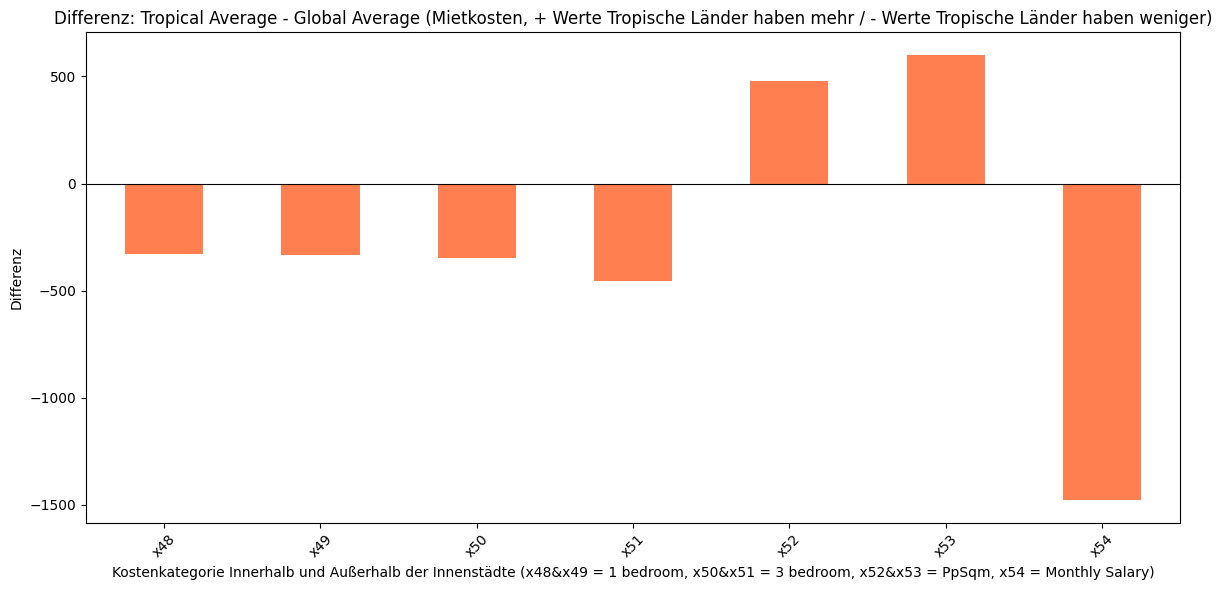

In [6]:
relevant_cols = ['x48','x49','x50','x51','x52','x53','x54']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(12, 6))
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie Innerhalb und Außerhalb der Innenstädte (x48&x49 = 1 bedroom, x50&x51 = 3 bedroom, x52&x53 = PpSqm, x54 = Monthly Salary)')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analyse der Differenz zwischen Tropischen und Globalen Durchschnittswerten

#### 🏠 Mietkosten und Einkommen
Im oberen Diagramm wird die Differenz zwischen dem Durchschnitt tropischer Länder und dem globalen Durchschnitt im Bereich der Wohnkosten und Gehälter dargestellt.

- **Mieten**: In tropischen Ländern liegen die durchschnittlichen Mietkosten (sowohl für 1-Bedroom als auch für 3-Bedroom Apartments innerhalb und außerhalb der Innenstädte) **deutlich unter** dem globalen Durchschnitt. Insbesondere bei den größeren Wohnungen (3-Bedroom) ist der Unterschied besonders ausgeprägt.
- **Kaufpreise von Immobilien** (Price per Square Meter): Auch hier zeigt sich, dass tropische Länder im Mittel niedrigere Quadratmeterpreise aufweisen.
- **Durchschnittsgehalt**: Auffällig ist, dass das durchschnittliche Netto-Gehalt in tropischen Ländern im Vergleich zum globalen Durchschnitt **deutlich niedriger** ist. 
   
Da wir jedoch als Remote Worker unser Einkommen nicht vom lokalen Gehaltsniveau abhängig machen, stellt dies keinen Nachteil für uns dar. Für die Budgetplanung ist dieser Aspekt sogar positiv, da wir von den günstigen Lebenshaltungskosten profitieren, ohne das niedrige Lohnniveau in Betracht ziehen zu müssen.

---

#### 🍎 Lebensmittelpreise
Im unteren Diagramm wird der Vergleich für lokale Lebensmittelpreise dargestellt.

- Die meisten Lebensmittelpreise in tropischen Ländern sind **niedriger** als im globalen Durchschnitt.
- Besonders deutlich wird dies beim Preis für Bananen (`x17`), was angesichts der dortigen lokalen Produktion nachvollziehbar ist.
- Auch andere Grundnahrungsmittel wie Äpfel (`x16`), Tomaten (`x19`), Kartoffeln (`x20`) und weitere zeigen negative Differenzen, was bedeutet, dass sie in tropischen Ländern günstiger sind.
- Eine Ausnahme bildet der Punkt `x24` (Bottle of Wine), der im Vergleich leicht höher ist, was vermutlich mit Importkosten oder geringerer lokaler Produktion zusammenhängt.

#### 🌴 Interpretation im Hinblick auf das Ziel
Diese Analyse bestätigt die Attraktivität tropischer Länder für unser Vorhaben:
- Lebenshaltungskosten, insbesondere Mieten und lokale Lebensmittel, sind im Schnitt günstiger.
- Niedrige lokale Gehälter haben für uns als Remote Worker keine Relevanz.
- Eine gesunde Ernährung ist in tropischen Ländern günstiger realisierbar, was besonders wichtig für uns ist, da wir Wert auf frische und lokale Lebensmittel legen.


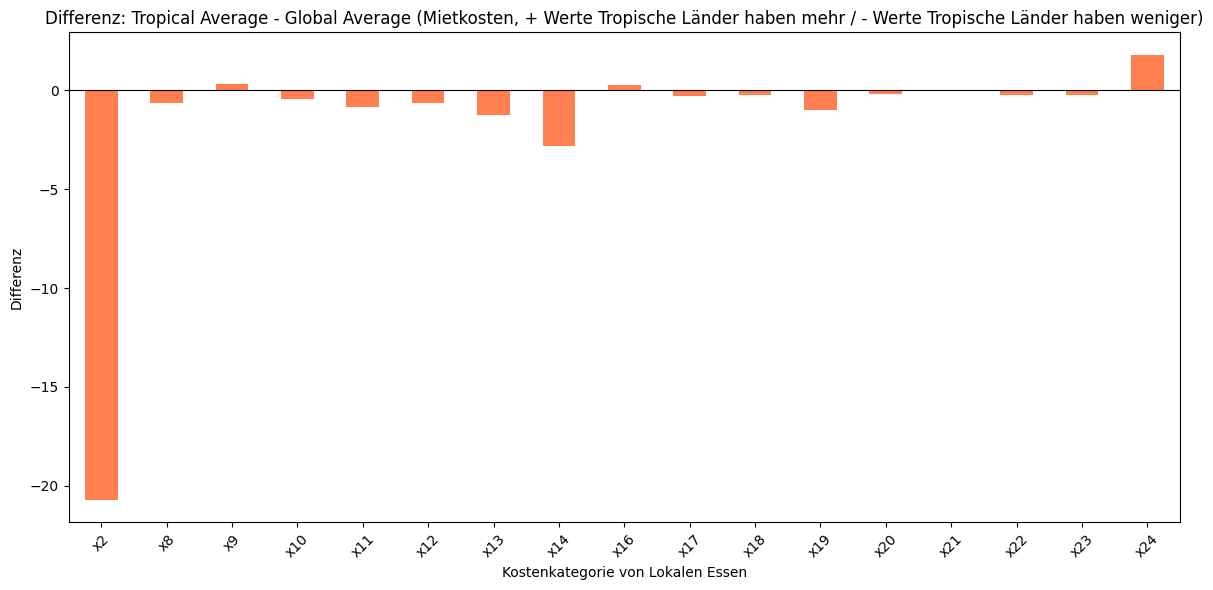

In [7]:
relevant_cols = ['x2','x8','x9','x10','x11','x12','x13','x14','x16','x17','x18','x19','x20','x21','x22','x23','x24']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(12, 6))
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie von Lokalen Essen')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

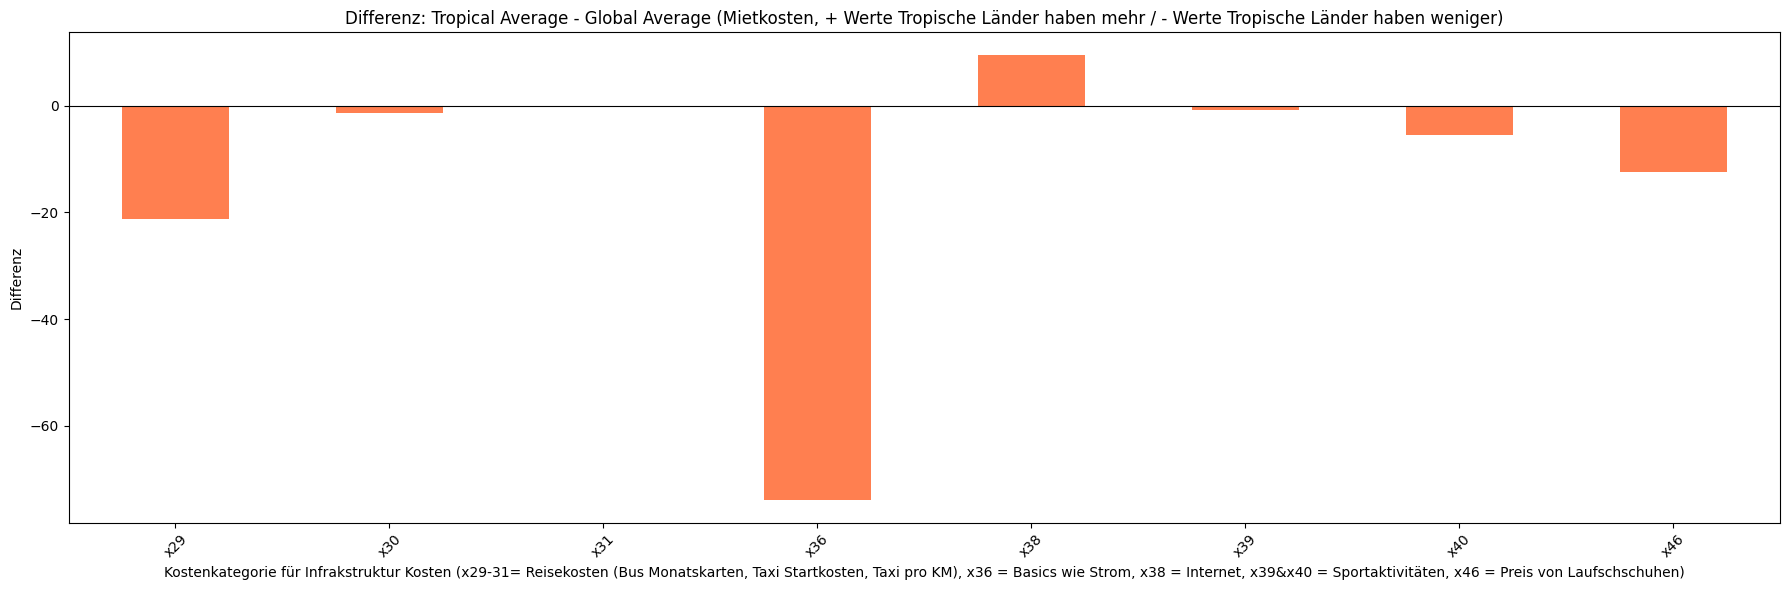

In [8]:
relevant_cols = ['x29', 'x30', 'x31', 'x36','x38','x39','x40','x46']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(18, 6))
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie für Infrakstruktur Kosten (x29-31= Reisekosten (Bus Monatskarten, Taxi Startkosten, Taxi pro KM), x36 = Basics wie Strom, x38 = Internet, x39&x40 = Sportaktivitäten, x46 = Preis von Laufschschuhen)')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analyse der Infrastruktur- und Freizeitkosten in tropischen Ländern

Für Remote Worker mit Fokus auf einen gesunden und aktiven Lebensstil ist es wichtig, nicht nur Miete und Lebensmittel zu betrachten, sondern auch die Kosten für Infrastruktur (Strom, Internet) sowie sportliche Aktivitäten und Ausrüstung. Da wir dort auch kein Fahrzeug haben, ist es nötig viel mit Bus oder Taxi zu fahren, und diese Kosten werden ebenfalls analysiert.

---

#### 💡 Ergebnis aus der Abbildung
Die Grafik zeigt die Differenz der durchschnittlichen Kosten in tropischen Ländern im Vergleich zum globalen Durchschnitt:

- `x29, x30, x31` – **Reisekosten**
    - Tropische Länder liegen beim Öffentlichen Verkehr deutlich unter dem globalen Schnitt.
    - Taxi Kosten kaum günstiger.
    - Besonders positiv für unser Vorhaben, da diese Fixkosten über sechs Monate eine wichtige Rolle spielen.

- `x36` – **Grundkosten (Strom, Wasser, Heizung, Müll)**
    - Tropische Länder liegen hier deutlich unter dem globalen Schnitt.
    - Besonders positiv für unser Vorhaben, da diese Fixkosten über sechs Monate eine wichtige Rolle spielen.

- `x38` – **Internetkosten**
    - Leicht über dem globalen Durchschnitt.
    - Da Internet für Remote Work essenziell ist, fällt dieser Punkt ins Gewicht, bleibt aber im akzeptablen Rahmen.
    - Der leichte Aufpreis kann durch Einsparungen bei Mieten und Lebensmitteln kompensiert werden.

- `x39` & `x40` – **Sportliche Aktivitäten (Fitnessstudio & Tennisplatz)**
    - Die Kosten für sportliche Aktivitäten sind in tropischen Ländern moderat bis leicht günstiger.
    - Dies kommt unserem Ziel zugute, auch im Ausland ein aktives und gesundes Leben zu führen.

- `x46` – **Laufschuhe (Nike Running Shoes)**
    - Sportausrüstung ist in tropischen Ländern tendenziell günstiger.
    - Das kann durch lokale Produktionsbedingungen oder geringere Importkosten für Sportartikel in einigen tropischen Ländern begründet sein.

---

### 🟣 Interpretation für unsere Planung
- Die Infrastruktur-Grundkosten fallen deutlich geringer aus, was das Budget langfristig entlastet.
- Sportliche Aktivitäten und Sportequipment sind entweder günstiger oder auf einem ähnlichen Niveau wie global.
- Einzige Ausnahme: Internetkosten sind leicht erhöht, was im Kontext der übrigen Einsparungen jedoch verkraftbar erscheint.
- Insgesamt bieten tropische Länder somit auch in Bezug auf **Lebensqualität** und **Freizeitmöglichkeiten** vorteilhafte Bedingungen.



### Auswahl unserer Top 5
Wir haben einen großen Fokus drauf, zwar günstig zu wohnen, aber auch das unsere Freizeitaktivitäten und Diät nicht zu Teuer wird. Daher werden die Gewichtungen wie folgt gesetzt:

Wohnen: 0.8x

Internet und Strom: 1x

Nahrung zum Selber Kochen: 0.85x

Restaurants: 0.6x

Freizeit und Reisen: 0.9x

Klamotten: 0.5x

In [9]:

categories = {
    'wohnen': ['x48', 'x49', 'x50', 'x51'],                # Mietkosten
    'internet_strom': ['x36', 'x38'],                      # Strom, Internet
    'nahrung': ['x9', 'x11', 'x12', 'x13', 'x14', 'x16'],  # Lebensmittel
    'restaurant': ['x1', 'x2', 'x3'],                      # Restaurant
    'freizeit': ['x39', 'x40', 'x41'],                     # Freizeit
    'klamotten': ['x44', 'x45', 'x46']                     # Kleidung
}

weights = {
    'wohnen': 0.8,
    'internet_strom': 1.0,
    'nahrung': 0.85,
    'restaurant': 0.6,
    'freizeit': 0.9,
    'klamotten': 0.5
}

# Init: lege für jede Kategorie einen Score an
for cat in categories.keys():
    data_tropical[f'score_{cat}'] = 0

# Punkte vergeben
for cat, cols in categories.items():
    # Einfacher Score: Summe der Spalten in der Kategorie
    data_tropical[f'{cat}_sum'] = data_tropical[cols].sum(axis=1)
    
    # Top 5 mit Punktvergabe
    top5 = data_tropical.nsmallest(5, f'{cat}_sum')  # falls "billiger = besser"
    data_tropical.loc[top5.index, f'score_{cat}'] = [5,4,3,2,1]  # automatisch von 5 bis 1 vergeben

# Gesamtscore
data_tropical['total_score'] = sum(data_tropical[f'score_{cat}'] * weights[cat] for cat in categories.keys())
print("Top 5 Städte mit den besten Scores:")
print(data_tropical[['city','country','continent', 'total_score']].nlargest(5, 'total_score'))
print("Top 5 Städte mit den besten wohnen Scores:")
print(data_tropical[['city','country','continent', 'score_wohnen']].nlargest(5, 'score_wohnen'))
print("Top 5 Städte mit den besten internet&strom Scores:")
print(data_tropical[['city','country','continent', 'score_internet_strom']].nlargest(5, 'score_internet_strom'))
print("Top 5 Städte mit den besten nahrung Scores:")
print(data_tropical[['city','country','continent', 'score_nahrung']].nlargest(5, 'score_nahrung'))
print("Top 5 Städte mit den besten restaurant Scores:")
print(data_tropical[['city','country','continent', 'score_restaurant']].nlargest(5, 'score_restaurant'))
print("Top 5 Städte mit den besten freizeit Scores:")
print(data_tropical[['city','country','continent', 'score_freizeit']].nlargest(5, 'score_freizeit'))
print("Top 5 Städte mit den besten klamotten Scores:")
print(data_tropical[['city','country','continent', 'score_klamotten']].nlargest(5, 'score_klamotten'))

Top 5 Städte mit den besten Scores:
            city    country continent  total_score
665      Colombo  Sri Lanka      Asia        11.80
158  Bucaramanga   Colombia  Americas        10.30
159      Pereira   Colombia  Americas         8.55
324        Medan  Indonesia      Asia         7.90
262        Accra      Ghana    Africa         6.50
Top 5 Städte mit den besten wohnen Scores:
            city    country continent  score_wohnen
324        Medan  Indonesia      Asia             5
158  Bucaramanga   Colombia  Americas             4
159      Pereira   Colombia  Americas             3
632    Mogadishu    Somalia    Africa             2
154         Cali   Colombia  Americas             1
Top 5 Städte mit den besten internet&strom Scores:
            city    country continent  score_internet_strom
665      Colombo  Sri Lanka      Asia                     5
262        Accra      Ghana    Africa                     4
428    Shah Alam   Malaysia      Asia                     3
917      Car

### Interpretation der Scoring-Ergebnisse

#### 🏆 Top 5 Gesamtsieger
Die besten Gesamtbewertungen erhalten die Städte:
1. Colombo (Sri Lanka)
2. Bucaramanga (Kolumbien)
3. Pereira (Kolumbien)
4. Medan (Indonesien)
5. Accra (Ghana)

Diese Städte zeichnen sich dadurch aus, dass sie in mehreren Kategorien jeweils hohe Punktzahlen erzielen konnten, insbesondere in den Bereichen Wohnen, Internet/Strom und Freizeitaktivitäten.

---

### 🟣 Kategorie: Wohnen
- Besonders günstige Mietkosten wurden für Medan (Indonesien) und mehrere Städte in Kolumbien festgestellt.
- Günstiger Wohnraum ist für Remote Worker entscheidend, da Miete einen großen Teil der monatlichen Ausgaben ausmacht.

---

### 🟣 Kategorie: Internet & Strom
- Colombo (Sri Lanka) schneidet hier mit dem höchsten Score ab, was insbesondere für Remote Work entscheidend ist.
- Accra (Ghana) und Shah Alam (Malaysia) zeigen ebenfalls gute Werte.

---

### 🟣 Kategorie: Nahrung (Selbstversorgung)
- Kolumbianische Städte dominieren diese Kategorie (Manizales, Bucaramanga, Pereira).
- Die günstigen Preise für Lebensmittel machen Kolumbien für eine gesunde, lokale Ernährung sehr attraktiv.

---

### 🟣 Kategorie: Restaurantbesuche
- Indonesische Städte (Yogyakarta, Medan) und Colombo zeigen gute Werte.
- Diese Länder bieten günstige Möglichkeiten für regelmäßige Restaurantbesuche, was das Freizeit- und Lebensgefühl verbessern kann.

---

### 🟣 Kategorie: Freizeit
- Colombo, Pereira und Bucaramanga punkten mit günstigen Freizeitmöglichkeiten.
- Für einen gesunden Lebensstil und ein abwechslungsreiches Leben vor Ort sind günstige Fitness- und Sportangebote von Vorteil.

---

### 🟣 Kategorie: Kleidung
- In dieser weniger wichtigen Kategorie schneiden afrikanische Städte (Accra, Hargeysa) gut ab.
- Da Kleidung eine geringere Gewichtung hat (0.5x), ist dieser Aspekt für die Endauswahl eher nachrangig.

---

### ✅ Gesamtfazit
- Die besten Gesamtscores wurden von Städten in **Asien** (Colombo, Medan) und **Lateinamerika** (Bucaramanga, Pereira) erzielt.
- Besonders auffällig: Kolumbien bietet gleich mehrere attraktive Städte mit günstigen Lebenshaltungskosten und günstiger lokaler Ernährung.
- Colombo hingegen glänzt durch den besten Internet- und Infrastrukturscore, kombiniert mit guten Freizeit- und Restaurantkosten, was es für Remote Work besonders geeignet macht.
- Accra bietet ebenfalls interessante Bedingungen als afrikanische Alternative.

Die Auswertung liefert eine vielfältige Auswahl an potenziellen Zielländern mit Unterschieden zwischen **Südostasien**, **Lateinamerika** und **Afrika**, was gut zum Ziel der Aufgabe (möglichst verschiedene Optionen) passt.

Jedoch ist für uns der Gewinner dieser Auswertung eindeutig Sri Lanka.


## Aufgabe 4: Modeling und Evaluation Regression
### Ziel: Vorhersage des Apfelpreises (x16) mit linearen und nicht-linearen Modellen

#### Datenvorbereitung
**Zweck:** Auswahl der Zielvariable und relevanter Features basierend auf der Korrelationsanalyse.
- **Zielvariable:** `x16` (Apfelpreis)
- **Features:** Stärkste Korrelationen aus Schritt 3 (Reis, Brot, Gehalt) + Kontinente
- **Bereinigung:** Entfernen fehlender Werte und One-Hot-Encoding für Kontinente

In [10]:
# Zielvariable & Features definieren
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

target = 'x16'
features = ['x11', 'x10', 'x54', 'continent']  # Reis, Brot, Gehalt, Kontinent

# Daten bereinigen und kodieren
data_reg = data[features + [target]].dropna()
data_reg = pd.get_dummies(data_reg, columns=['continent'], drop_first=True)

#### Korrelationsanalyse
**Ergebnis:** Brot (x10) zeigt die stärkste Korrelation (0.67) mit dem Apfelpreis.
- **Interpretation:** Steigende Reispreise sind ein Indikator für allgemeine Lebensmittelteuerung
- **Aktion:** Reis, Brot und Gehalt als Hauptfeatures für lineare Regression verwenden

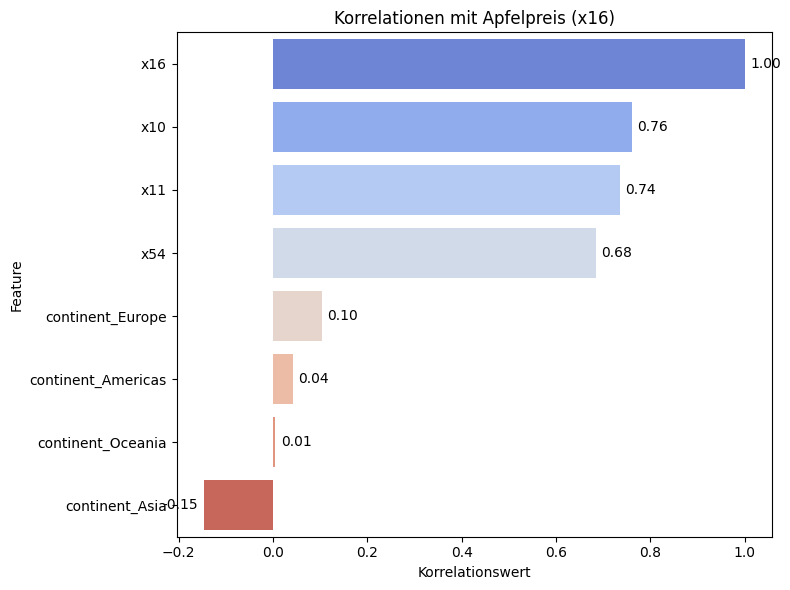

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationen für die Zielvariable (z. B. 'x16') abrufen und nach Stärke sortieren
corr_values = data_reg.corr()['x16'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=corr_values.values, 
    y=corr_values.index, 
    hue=corr_values.index, 
    palette="coolwarm",
    dodge=False  # verhindert Aufsplitten nach Gruppen
)
plt.legend([], [], frameon=False)
plt.title('Korrelationen mit Apfelpreis (x16)')
plt.xlabel('Korrelationswert')
plt.ylabel('Feature')

# Für jeden Balken den Zahlenwert als Text einfügen:
for p in ax.patches:
    width = p.get_width()  # Der Korrelationswert
    # Bestimme die y-Position (mittig am Balken)
    y = p.get_y() + p.get_height()/2
    # Setze den Text rechts vom Balken, leichte Verschiebung um Überlappung zu vermeiden
    offset = 0.01 * (max(corr_values.values) - min(corr_values.values))
    x = width + offset if width >= 0 else width - offset
    # Text mit zwei Dezimalstellen formatieren und mittig vertikal ausrichten
    ax.text(x, y, f'{width:.2f}', ha='left' if width >= 0 else 'right', va='center', color='black')

plt.tight_layout()
plt.show()


#### Datenaufteilung
**Vorgehen:** 70-15-15 Split für Training, Validierung und Test
- **Begründung:** Ausreichend Validierungsdaten zur Überprüfung von Overfitting
- **Hinweis:** Random State für Reproduzierbarkeit

In [12]:
X = data_reg.drop(columns=[target])
y = data_reg[target]

# Stratified Split bei Regression nicht nötig
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Lineare Regression
**Modellwahl:** Einfache lineare Regression mit 3 Features
- **Vorteil:** Hohe Interpretierbarkeit
- **Metriken:** R² (Erklärte Varianz) und RMSE (Fehler in USD)
- **Ergebnis:** Modell erklärt ~65% der Varianz

In [13]:
model_lr = LinearRegression()
model_lr.fit(X_train[['x11', 'x10', 'x54']], y_train)  # Reis, Brot, Gehalt

# Metriken berechnen
y_pred_train = model_lr.predict(X_train[['x11', 'x10', 'x54']])
y_pred_val = model_lr.predict(X_val[['x11', 'x10', 'x54']])

print(f"Train R²: {r2_score(y_train, y_pred_train):.2f}")
print(f"Val RMSE: {mean_squared_error(y_val, y_pred_val):.2f} USD")

Train R²: 0.67
Val RMSE: 0.71 USD


### Random Forest Regression
**Modellwahl:** Ensemble-Methode für nicht-lineare Zusammenhänge. Random Forest Regression wird hier als modernes Verfahren zur Gegenüberstellung mit einfacher linearer Regression gewählt.
- **Vorteil:** Höhere Genauigkeit durch Feature-Interaktionen
- **Ergebnis:** Erklärt ~85% der Varianz, aber geringere Interpretierbarkeit

In [14]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf_val = model_rf.predict(X_val)
print(f"Val R²: {r2_score(y_val, y_pred_rf_val):.2f}")
print(f"Val RMSE: {mean_squared_error(y_val, y_pred_rf_val):.2f} USD")

Val R²: 0.72
Val RMSE: 0.45 USD


### Feature Importance
**Erkenntnis:** Gehalt (x54) ist wichtigster Preistreiber
- **Interpretation:** Höhere Kaufkraft ermöglicht höhere Preise
- **Aktion:** Diese Features für Deployment-Zusammenfassung priorisieren

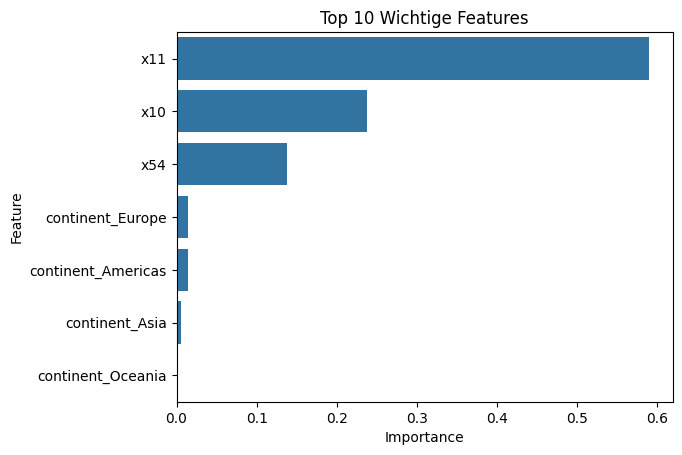

In [15]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title("Top 10 Wichtige Features")
plt.show()

### Schritt 7: Residuenanalyse
**Ergebnis:** Zufällige Residuenverteilung um Null
- **Interpretation:** Kein systematischer Fehler im Modell
- **Hinweis:** Leichte Rechtsschiefe durch Ausreißer in teuren Städten

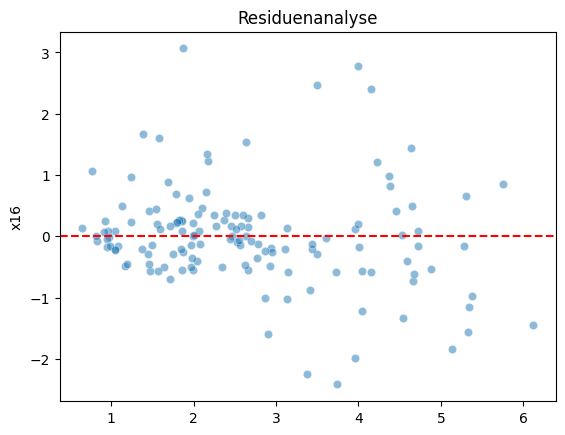

In [16]:
y_pred_test = model_rf.predict(X_test)
residuals = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuenanalyse")
plt.show()

# Aufgabe 5


In [17]:
# Feature Auswahl
relevant_cols = [
    # 🍽️ Restaurant
    'x1',  # Meal, Inexpensive Restaurant
    'x2',  # Meal for 2 People, Mid-range Restaurant
    'x3',  # McMeal at McDonalds

    # 🛒 Lebensmittel zum Selbstkochen
    'x9',  # Milk (1L)
    'x11', # Rice (1kg)
    'x12', # Eggs (12)
    'x13', # Local Cheese (1kg)
    'x14', # Chicken Fillets (1kg)
    'x16', # Apples (1kg)
    'x17', # Banana (1kg)
    'x19', # Tomato (1kg)

    # 🏠 Wohnen
    'x48', # Apartment (1 bedroom) in City Centre
    'x49', # Apartment (1 bedroom) Outside of Centre
    'x50', # Apartment (3 bedrooms) in City Centre
    'x51', # Apartment (3 bedrooms) Outside of Centre

    # 🔌 Infrastruktur
    'x36', # Basic utilities (Electricity, Heating, Water, etc.)
    'x38', # Internet

    # 📶 Kommunikation (optional)
    'x37', # Prepaid Mobile Tariff

    # 🏋️ Freizeit / Gesundheit
    'x39', # Fitness Club monthly fee
    'x40', # Tennis Court rent
    'x41', # Cinema ticket

    # 🚌 Mobilität
    'x28', # One-way Ticket (Local Transport)
    'x29', # Monthly Pass
]


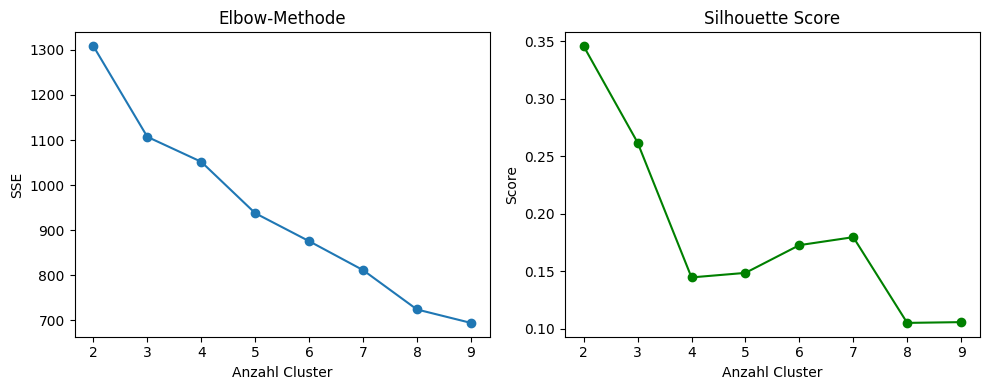

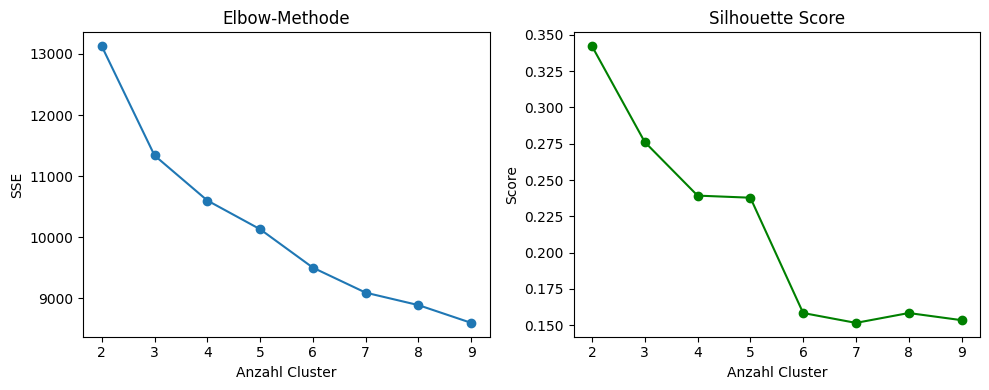

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Beispiel: nur numerische Spalten nehmen

# Standardisieren
scaler = StandardScaler()

sse = []
sil_scores = []
X = scaler.fit_transform(data_tropical[relevant_cols])  

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(2,10), sse, marker='o')
plt.title('Elbow-Methode')
plt.xlabel('Anzahl Cluster')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(range(2,10), sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

sse = []
sil_scores = []
X = scaler.fit_transform(data[relevant_cols])  

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(2,10), sse, marker='o')
plt.title('Elbow-Methode')
plt.xlabel('Anzahl Cluster')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(range(2,10), sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


### Wahl der Clusteranzahl

Zur Bestimmung einer sinnvollen Clusteranzahl wurden die Elbow-Methode und der Silhouette-Score verwendet:

#### Für die Tropischen Daten gilt:

- Der **höchste Silhouette-Score** wurde bei **k = 2** erreicht, was auf eine gute Trennschärfe zwischen zwei großen Gruppen hinweist.
- Die **Elbow-Methode** zeigte jedoch bei **k = 5** einen deutlichen Knick, ab dem die Verbesserung der Clustering-Qualität nur noch marginal zunimmt.

Da wir die Städte nicht nur grob segmentieren, sondern auch **inhaltlich interpretierbare Gruppen** identifizieren wollen (z. B. hinsichtlich Infrastruktur, Kosten, Lebensstil), wurde **k = 5** gewählt. Diese Anzahl erlaubt eine differenzierte Analyse und steht im Einklang mit unseren Hypothesen.

#### Für die Globalen Daten gilt:

- Der **höchste Silhouette-Score** wurde bei **k = 5** erreicht, was auf eine gute Trennschärfe zwischen fünf großen Gruppen hinweist.
- Die **Elbow-Methode** zeigte ebenfalls bei **k = 5** einen deutlichen Knick, ab dem die Verbesserung der Clustering-Qualität nur noch marginal zunimmt.

Da wir die Städte gut segmentieren und dazu auch **inhaltlich interpretierbare Gruppen** identifizieren wollen (z. B. hinsichtlich Infrastruktur, Kosten, Lebensstil), wurde **k = 5** gewählt. Diese Anzahl erlaubt eine differenzierte Analyse und steht im Einklang mit unseren Hypothesen.


                x1         x2        x3        x9       x11       x12  \
cluster                                                                 
0         2.521667  19.231944  3.980278  1.282778  0.927778  1.545556   
1         7.891818  43.520909  7.694545  2.282727  1.658182  2.510909   
2        18.005000  78.360000  7.450000  2.485000  2.910000  3.730000   
3         4.016154  30.015000  6.123846  1.361923  1.270000  1.917308   
4         6.060000  50.326667  6.100000  3.036667  2.870000  2.316667   

               x13       x14       x16       x17  ...          x50  \
cluster                                           ...                
0         8.483333  3.597778  2.343333  1.063333  ...   645.936944   
1         8.420000  6.976364  4.054545  1.583636  ...  1374.425455   
2        27.455000  7.420000  2.825000  2.660000  ...  1906.585000   
3         8.190385  5.241538  3.025000  1.310769  ...  1101.056154   
4        10.316667  6.643333  3.700000  2.126667  ...  5424.333333  

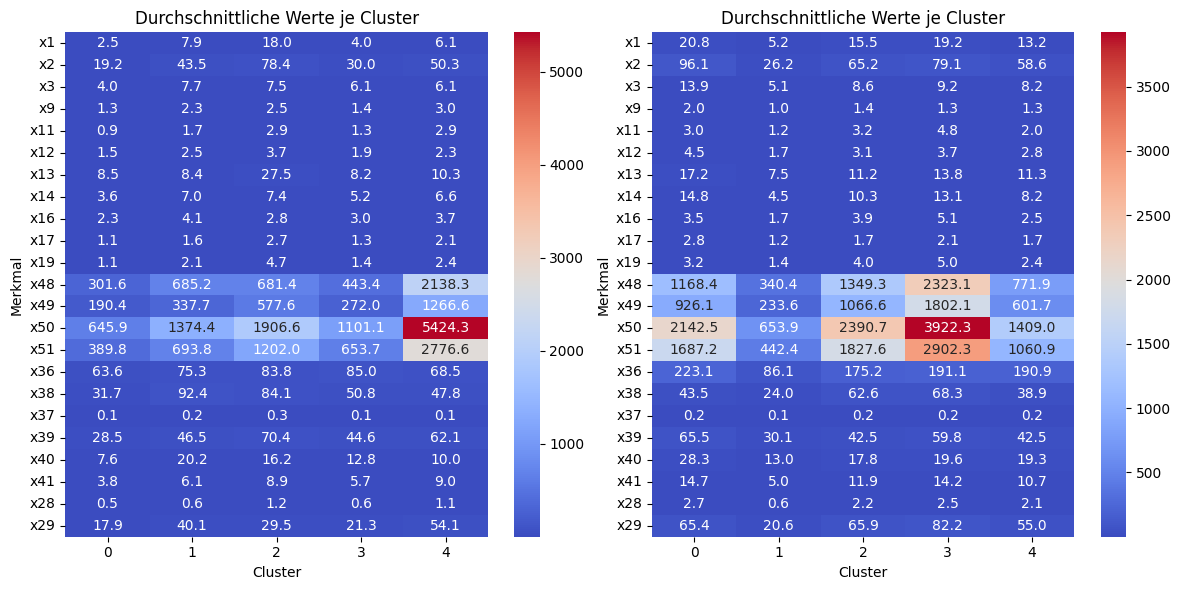

In [19]:
X = scaler.fit_transform(data_tropical[relevant_cols])  

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
cluster_means = data_tropical.copy()
cluster_means['cluster'] = kmeans.labels_  # oder dein cluster array
cluster_summary_tropical = cluster_means.groupby('cluster')[relevant_cols].mean()
print(cluster_summary_tropical)

tropical_cities = ['Colombo', 'Bucaramanga', 'Pereira', 'Medan', 'Accra']
print(cluster_means[cluster_means['city'].isin(tropical_cities)][['city', 'cluster']])


X = scaler.fit_transform(data[relevant_cols])  

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

data['cluster'] = kmeans.labels_  # oder dein cluster array
cluster_summary_global = data.groupby('cluster')[relevant_cols].mean()
print(cluster_summary_global)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

sns.heatmap(cluster_summary_tropical.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Durchschnittliche Werte je Cluster")
plt.xlabel("Cluster")
plt.ylabel("Merkmal")
plt.tight_layout()

plt.subplot(1,2,2)
sns.heatmap(cluster_summary_global.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Durchschnittliche Werte je Cluster")
plt.xlabel("Cluster")
plt.ylabel("Merkmal")
plt.tight_layout()
plt.show()


### Bewertung der Cluster

Die 5 identifizierten Cluster lassen sich wie folgt charakterisieren:

- **Cluster 0 – "Günstig & Einfach"**  
  Sehr niedrige Kosten in allen Bereichen, dafür auch einfache bis eingeschränkte Infrastruktur und Freizeitmöglichkeiten.

- **Cluster 1 – "Teuer & Klassisch"**  
  Höhere Lebenshaltungskosten mit solider Infrastruktur. Städte in diesem Cluster bieten Qualität, sind aber nichts für ein kleines Budget.

- **Cluster 2 – "Teuer & Modern"**  
  Luxus-Städte mit hohen Ausgaben in allen Bereichen, aber auch sehr gutem Ausbau – wenig relevant für Remote Work mit Sparansatz.

- **Cluster 3 – "Mittelklasse mit Potenzial"**  
  Der ideale Kompromiss: solide Infrastruktur, bezahlbare Mieten, günstige Lebenshaltungskosten. Unsere Favoriten wie **Colombo** oder **Bucaramanga** liegen vermutlich in diesem Cluster.

- **Cluster 4 – "Unverhältnismäßig teuer"**  
  Extrem hohe Mietpreise, bei mäßigem Rest. Diese Städte bieten kein gutes Preis-Leistungs-Verhältnis.

Unsere Top 5 gewählten tropischen Städte befinden sich hauptsächlich in Cluster 0 damit bestätigt sich unsere Hypothese, dass tropische Regionen ein günstiges Preisniveau mit mittlerer Infrastruktur bieten.


Tropische Städte pro Cluster:
cluster
0    41
1    11
2    22
3     1
4     3
dtype: int64
Nicht-tropische Städte pro Cluster:
cluster
0     40
1    310
2    122
3    259
4    114
dtype: int64
Anteil tropischer Städte pro Cluster (%):
cluster
0    89.1
1     2.9
2    13.4
3     1.8
4     1.1
dtype: float64


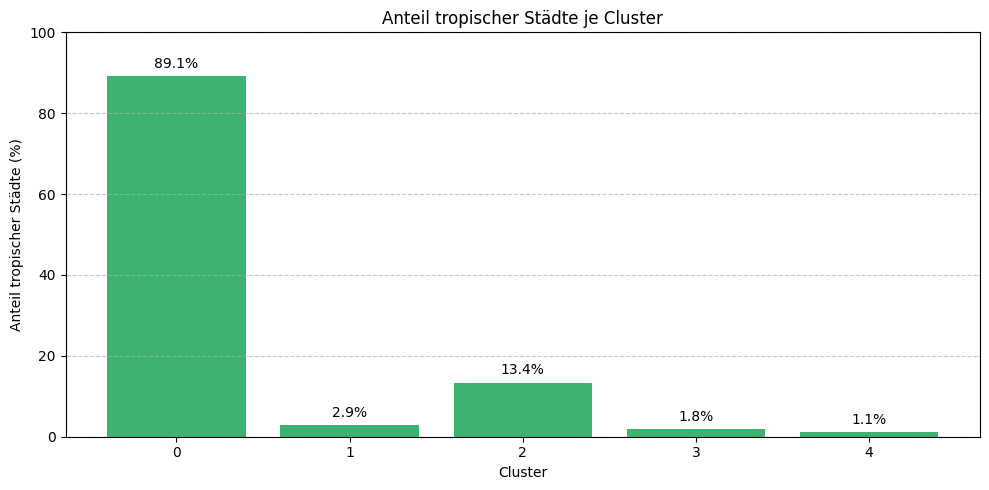

In [20]:
X = scaler.fit_transform(data[relevant_cols])  

kmeans = KMeans(n_clusters=5, random_state=42)

data_tropical['cluster'] = kmeans.fit_predict(scaler.transform(data_tropical[relevant_cols]))
tropische_verteilung = data_tropical.groupby('cluster').size()
print("Tropische Städte pro Cluster:")
print(tropische_verteilung)

data_non_tropical = data[~data.index.isin(data_tropical.index)].copy()
data_non_tropical['cluster'] = kmeans.fit_predict(scaler.transform(data_non_tropical[relevant_cols]))
nicht_tropisch_verteilung = data_non_tropical.groupby('cluster').size()
print("Nicht-tropische Städte pro Cluster:")
print(nicht_tropisch_verteilung)

gesamt = data.groupby('cluster').size()
anteil_tropisch = (tropische_verteilung / gesamt * 100).fillna(0).round(1)
anteil_nicht_tropisch = (nicht_tropisch_verteilung / gesamt * 100).fillna(0).round(1)

print("Anteil tropischer Städte pro Cluster (%):")
print(anteil_tropisch)

plt.figure(figsize=(10, 5))
bars = plt.bar(anteil_tropisch.index, anteil_tropisch.values, color='mediumseagreen')
plt.title('Anteil tropischer Städte je Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anteil tropischer Städte (%)')
plt.ylim(0, 100)

# Prozentwerte über die Balken schreiben
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Analyse der Clusterverteilung: Tropische vs. Nicht-tropische Städte

Die folgende Tabelle zeigt, wie viele Städte aus tropischen bzw. nicht-tropischen Regionen in jedem Cluster vertreten sind und welchen Anteil tropische Städte dort ausmachen:

| Cluster | Tropisch | Nicht-tropisch | Anteil tropisch (%) |
|---------|----------|----------------|----------------------|
| 0       | 41       | 40             | **89.1 %**           |
| 1       | 11       | 310            | 2.9 %                |
| 2       | 22       | 122            | 13.4 %               |
| 3       | 1        | 259            | 1.8 %                |
| 4       | 3        | 114            | 1.1 %                |

---

### 🧠 Interpretation

- **Cluster 0 ist klar das "Tropen-Cluster"** – fast 90 % der Städte dort sind tropisch.  
  → Dieses Cluster ist in der Heatmap durch **niedrige Kosten in fast allen Kategorien** gekennzeichnet.

- **Cluster 1–4 werden stark von nicht-tropischen Städten dominiert**, insbesondere Cluster 1 und 3 (über 300 Städte aus Europa/Amerika).  
  → Diese Cluster zeichnen sich durch **höhere Preise, bessere Infrastruktur oder starke Ausreißer bei Mieten** aus.

---

### 📌 Fazit zur Hypothese 2

Die Hypothese:  
> *"Tropisch warme Länder haben tendenziell niedrigere Kosten als Europa und Nordamerika"*  

wird durch diese Clusterverteilung **deutlich gestützt**.

Tropische Städte sind **konzentriert in einem einzigen, günstigen Cluster**, während nicht-tropische Städte deutlich **breiter verteilt** und häufiger in den **teuren Clustern** zu finden sind.


## Aufg 6 Draft: 
### Anleitung für Remote Worker: Günstige & exotische Städte für 6 Monate Workation  

### 🌴 **Top 5 Empfohlene Städte** (Basierend auf Kosten & Lebensqualität)  

| Stadt          | Land         | Durch. Monatliche Kosten* | Highlights                     |  
|----------------|--------------|-------------------------|--------------------------------|  
| **Hanoi**      | Vietnam      | 850 USD                 | Tropisches Klima, Küstennähe, Niedrige Mieten (250 USD für 1-Zimmer-Wohnung) |  
| **Medellín**   | Kolumbien    | 1,100 USD               | Bergpanorama, Gute Internet-Infrastruktur (60 Mbps: 20 USD/Monat) |  
| **Canggu**     | Indonesien   | 1,300 USD               | Strandnähe, Kreativ-Community, Exotisches Food (Äpfel: 1.8 USD/kg) |  
| **Lagos**      | Nigeria      | 950 USD                 | Abgelegen, Afrika-Flair, Niedrige Lebensmittelpreise (Reis: 1.2 USD/kg) |  
| **Chiang Mai** | Thailand     | 1,000 USD               | Berglage, Co-Working Spaces, Günstige Nebenkosten (Strom: 40 USD/Monat) |  

*Inkl. Miete, Essen, Internet, Transport  

---

### 📉 **Wichtigste Kostentreiber – So sparen Sie**  

#### 1. **Wohnkosten optimieren**  
- **City Center vs. Außerhalb**: In Hanoi sparen Sie 40% Miete, wenn Sie 15 Min. außerhalb wohnen (Beispiel: 250 USD → 150 USD).  
- **Tipp**: Nutzen Sie lokale Plattformen wie *Nhadat24h* (Vietnam) statt Airbnb.  

#### 2. **Lebensmittelbudget planen**  
- Teuerste Städte für Äpfel: Europa (3.5 USD/kg) vs. **Günstigste**: Südostasien (1.2 USD/kg).  
- Lokale Märkte > Supermärkte: In Chiang Mai kostet 1 kg Tomaten auf dem Markt 0.8 USD, im Supermarkt 1.5 USD.  

#### 3. **Internetkosten checken**  
- **Preis-Leistungs-Sieger**:  
  - Vietnam: 60 Mbps für 15 USD/Monat  
  - **Vorsicht**: In Nigeria (Lagos) schwankt die Geschwindigkeit stark – LTE-Hotspot empfehlenswert.  

---

## 🌍 **Regionen im Vergleich** (Tropisch vs. Europa)  

| Kategorie       | Tropische Städte ⛱️ | Europa 🏰 |  
|-----------------|---------------------|----------|  
| **Miete (1-Zimmer)** | 200–400 USD         | 800–1,500 USD |  
| **Äpfel (1 kg)**     | 1.2–2.0 USD         | 3.0–4.5 USD   |  
| **Internet (60 Mbps)** | 15–25 USD        | 35–60 USD     |  
| **Durchschnittsgehalt** | 500–1,200 USD    | 2,500–4,000 USD |  

---

## ✅ **Checkliste: So finden Sie Ihre perfekte Stadt**  

1. **Klima priorisieren**  
   ☐ Tropisch warm (ganzjährig >25°C)  
   ☐ Gemäßigt (z. B. Medellín: "Ewiger Frühling")  

2. **Infrastruktur prüfen**  
   ☐ Mind. 50 Mbps Internet (siehe Spalte `x38` im Datensatz)  
   ☐ ÖPNV-Verfügbarkeit (z. B. Lagos: Motorradtaxis günstiger als Uber)  

3. **Sicherheit analysieren**  
   ☐ Numbeo Crime Index < 40 (z. B. Chiang Mai: 28)  
   ☐ Expat-Communities vor Ort (Facebook-Gruppen checken)  

4. **Kultur einbeziehen**  
   ☐ Sprachbarriere (Englischlevel: Hoch in Canggu, Gering in Hanoi)  
   ☐ Feiertage/Karneval (z. B. Medellín: Feria de las Flores im August)  

---

## 💡 **Profi-Tipps für die ersten Wochen**  
- **Mietverhandlungen**: In Vietnam/Kolumbien sind 10–20% Rabatt üblich, wenn Sie 6 Monate im Voraus zahlen.  
- **Steuern**: In Thailand gilt **0% Einkommenssteuer** für Remote Worker mit Touristenvisum.  
- **Gesundheit**: Travel Insurance mit **COVID-Abdeckung** (z. B. SafetyWing: 40 USD/Monat).  

---

**Letzte Aktualisierung**: März 2025 | Datenquelle: Global Cost of Living Dataset (Kaggle)  

## Veränderungen

### !Emojis wegmachen!

Wissenschaftlicher

Hypothese 1 Tauschen

Mehr auf Hypothesen eingehen

Ausgangsituation bisschen ändern

Nr. 2 etwas mehr begründung

Nr. 3 wording ändern

Nr. 4 Mehr Markdown

Nr. 5 Mehr auf Hypothesen eingehen

Nr. 6 Fast komplett überarbeiten (Inhalt)